In [2]:
"""
书名：Python网络数据采集
"""
"""
第一章：初见网络爬虫
"""
from urllib.request import urlopen
html = urlopen("http://www.pythonscraping.com/pages/page1.html")
print(html.read())

b'<html>\n<head>\n<title>A Useful Page</title>\n</head>\n<body>\n<h1>An Interesting Title</h1>\n<div>\nLorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.\n</div>\n</body>\n</html>\n'


In [2]:
 from bs4 import BeautifulSoup

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen("http://www.pythonscraping.com/pages/page1.html")
bsObj = BeautifulSoup(html.read())
print(bsObj)

<html>
<head>
<title>A Useful Page</title>
</head>
<body>
<h1>An Interesting Title</h1>
<div>
Lorem ipsum dolor sit amet, consectetur adipisicing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
</div>
</body>
</html>



In [4]:
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup
def getTitle(url):
    try:
        html = urlopen(url)
    except HTTPError as e:
        return None
    try:
        bsObj = BeautifulSoup(html.read())
        title = bsObj.body.h1
    except AttributeError as e:
        return None
    return title
title = getTitle("http://www.pythonscraping.com/pages/page1.html")
if title == None:
    print("Title could not be found")
else:
    print(title)

<h1>An Interesting Title</h1>


In [5]:
"""
第二章：复杂HTML解析
"""
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen("http://www.pythonscraping.com/pages/warandpeace.html")
bsObj = BeautifulSoup(html)
"""
findAll(tag, attributes, recursive, text, limit, keywords)
find(tag, attributes, recursive, text, keywords)
tag:传一个标签的名称或多个标签名称组成的 Python列表,如.findAll({"h1","h2","h3","h4","h5","h6"})
attributes:一个 Python 字典封装一个标签的若干属性和对应的属性值,如:.findAll("span", {"class":{"green", "red"}})
recursive:抓取 HTML 文档标签结构里多少层的信息,recursive 设置为 True，findAll 就会根据你的要求去查找标签参数的所有子标签，以及子
标签的子标签,如果 recursive 设置为 False，findAll 就只查找文档的一级标签。
text:用标签的文本内容去匹配，而不是用标签的属性。
limit:如果你只对网页中获取的前 x 项结果感兴趣，就可以设置它.find 其实等价于 findAll 的 limit 等于1 时的情形。
keyword:你选择那些具有指定属性的标签,.findAll(id="text"),有点冗余，第二个参数似乎可以表示它，
当使用.findAll(class="green")会报错，必须得用.findAll(class_="green")或者.findAll("", {"class":"green"})
"""
nameList = bsObj.findAll("span", {"class":"green"})
for name in nameList:
    print(name.get_text())

Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowager Empress Marya Fedorovna
the baron
Anna Pavlovna
the Empress
the Empress
Anna Pavlovna's
Her Majesty
Baron
Funke
The prince
Anna
Pavlovna
the Empress
The prince
Anatole
the prince
The prince
Anna
Pavlovna
Anna Pavlovna


In [6]:
"""
beautifulsoup四种对象：
BeautifulSoup 对象，前面代码示例中的 bsObj
标签 Tag 对象，例如bsObj.div.h1
NavigableString 对象，用来表示标签里的文字，不是标签（有些函数可以操作和生成 NavigableString 对象，而不是标签对象）。
Comment 对象，用来查找 HTML 文档的注释标签，<!-- 像这样 -->
"""
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen("http://www.pythonscraping.com/pages/page3.html")
bsObj = BeautifulSoup(html)
#注意区分children和descendants，打印前者时只会打印第一后代，后者所有后代都会打印出来
for child in bsObj.find("table",{"id":"giftList"}).children:
    print(child)



<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>


<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>


In [7]:
# from urllib.request import urlopen
# from bs4 import BeautifulSoup
# html = urlopen("http://www.pythonscraping.com/pages/page3.html")
# bsObj = BeautifulSoup(html)
# for child in bsObj.find("table",{"id":"giftList"}).descendants:
#     print(child)

In [8]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen("http://www.pythonscraping.com/pages/page3.html")
bsObj = BeautifulSoup(html)
#BeautifulSoup 的 next_siblings() 函数可以让收集表格数据成为简单的事情，尤其是处理带标题行的表格
for sibling in bsObj.find("table",{"id":"giftList"}).tr.next_siblings:
    print(sibling)



<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>
</td></tr>


<tr class="gift" id="gift4"><td>
Dead Parrot
</td><td>
This is an ex-parr

In [9]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
html = urlopen("http://www.pythonscraping.com/pages/page3.html")
bsObj = BeautifulSoup(html)
print(bsObj.find("img",{"src":"../img/gifts/img1.jpg"
 }).parent.previous_sibling.get_text())


$15.00



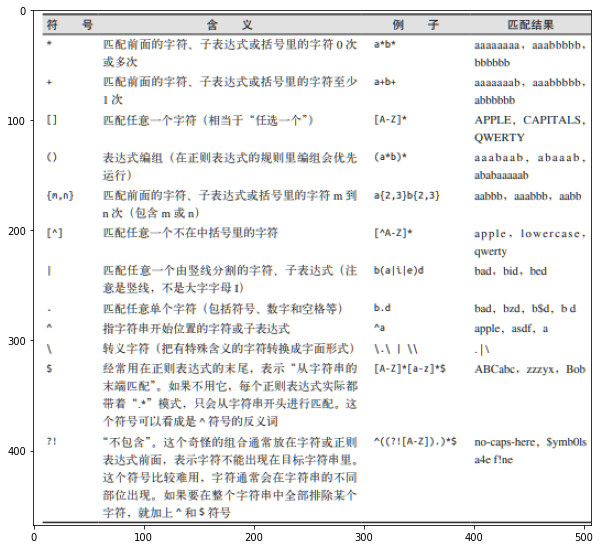

In [10]:
#正则表达式规则
import pandas as pd
import cv2
import matplotlib.pyplot as plt
regex = cv2.imread("./regex.png")
plt.figure(figsize=(10,10))
plt.imshow(regex)

In [11]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
html = urlopen("http://www.pythonscraping.com/pages/page3.html")
bsObj = BeautifulSoup(html)
images = bsObj.findAll("img",{"src":re.compile("\.\.\/img\/gifts/img.*\.jpg")})
for image in images:
    print(image.attrs["src"])
    print(image["src"])

../img/gifts/img1.jpg
../img/gifts/img1.jpg
../img/gifts/img2.jpg
../img/gifts/img2.jpg
../img/gifts/img3.jpg
../img/gifts/img3.jpg
../img/gifts/img4.jpg
../img/gifts/img4.jpg
../img/gifts/img6.jpg
../img/gifts/img6.jpg


In [12]:
#lambda
tag = bsObj.findAll(lambda tag: len(tag.attrs) == 2)
print(len(tag))

6


In [13]:
"""
第三章：开始采集
"""
from urllib.request import urlopen
from bs4 import BeautifulSoup
import datetime
import random

random.seed(datetime.datetime.now())

def GetLinks(articleurl):
    html = urlopen(articleurl)
    bsObj = BeautifulSoup(html)
    links = []
    #并没有加异常处理，当html文件里没有main字段时会报错
    for link in bsObj.find("main").findAll("a"):
        if 'href' in link.attrs:
            rr = re.compile(r'https://blog.csdn.net/.+', re.I)
            k = rr.findall(link.attrs['href'])
            if(k):
                if link.attrs['href'] not in links:
                    links.append(link)
    return links
"""
links = GetLinks("https://blog.csdn.net/qq_39451578/article/details/104216121")
num = 1
while len(links) > 0:
    if num > 20:
        break
    num += 1
    newArticle = links[random.randint(0, len(links)-1)].attrs["href"]
    print(newArticle)
    links = GetLinks(newArticle)
"""

'\nlinks = GetLinks("https://blog.csdn.net/qq_39451578/article/details/104216121")\nnum = 1\nwhile len(links) > 0:\n    if num > 20:\n        break\n    num += 1\n    newArticle = links[random.randint(0, len(links)-1)].attrs["href"]\n    print(newArticle)\n    links = GetLinks(newArticle)\n'

In [14]:
#采集整个网站
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
pages = set()
num = 1
def getLinks(pageUrl):
    global pages
    global num
    try:
        html = urlopen(pageUrl)
        bsObj = BeautifulSoup(html)
        try:
            print(bsObj.find("main").find("h1", {"class":"title-article"}).get_text())
        except AttributeError:
            print("页面缺少一些属性！不过不用担心！")
        for link in bsObj.findAll("a"):
            if 'href' in link.attrs:
                rr = re.compile(r'https://blog.csdn.net/.+/article/details/[0-9]+$', re.I)
                k = rr.findall(link.attrs['href'])
                if k:
                    if link.attrs['href'] not in pages:
                    # 我们遇到了新页面
                        newPage = link.attrs['href']
                        print("----------------\n"+newPage)
                        pages.add(newPage)
                        if num < 20:
                            num += 1
                            getLinks(newPage)
    #except error.URLError as e
    except Exception as e:
        print(e)   
#getLinks("https://blog.csdn.net/serverke/article/details/108140525")

In [20]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import datetime
import random
pages = set()
random.seed(datetime.datetime.now())

# 获取页面所有内链的列表
def getInternalLinks(bsObj, includeUrl):
    internalLinks = []
    # 找出所有以"/"开头的链接
    for link in bsObj.findAll("a", href=re.compile("^(/|.*"+includeUrl+")")):
        if link.attrs['href'] is not None:
            if link.attrs['href'] not in internalLinks:
                internalLinks.append(link.attrs['href'])
    return internalLinks

# 获取页面所有外链的列表
def getExternalLinks(bsObj, excludeUrl):
    externalLinks = []
    # 找出所有以"http"或"www"开头且不包含当前URL的链接
    for link in bsObj.findAll("a",
        href=re.compile("^(http|www)((?!"+excludeUrl+").)*$")):
            if link.attrs['href'] is not None:
                if link.attrs['href'] not in externalLinks:
                    externalLinks.append(link.attrs['href'])
    return externalLinks

def splitAddress(address):
    addressParts = address.replace("http://", "").split("/")
    return addressParts

def getRandomExternalLink(startingPage):
    html = urlopen(startingPage)
    bsObj = BeautifulSoup(html)
    externalLinks = getExternalLinks(bsObj, splitAddress(startingPage)[0])
    
    if len(externalLinks) == 0:
        internalLinks = getInternalLinks(startingPage)
        return getNextExternalLink(internalLinks[random.randint(0,len(internalLinks)-1)])
    else:
        return externalLinks[random.randint(0, len(externalLinks)-1)]
num = 1  
def followExternalOnly(startingSite):
    global num
    externalLink = getRandomExternalLink("http://oreilly.com")
    print("随机外链是："+externalLink)
    if num < 100:
        num += 1
        followExternalOnly(externalLink)
    
followExternalOnly("http://oreilly.com")

URLError: <urlopen error [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。>

In [ ]:
# address = "http://oreilly.com"
# addressParts = address.replace("http://", "").split("/")
# print(addressParts)

In [ ]:
#scrapy 见项目中spider文件夹
# scrapy crawl article -s LOG_FILE=wiki.log
#scrapy crawl article -o articles.csv -t csv
#scrapy crawl article -o articles.json -t json
#scrapy crawl article -o articles.xml -t xml